This code sets up a simple linear regression problem and prepares for training a model using gradient descent. Here's a high-level overview of what it does:

1. Generates Synthetic Data

It creates random input values and computes the corresponding output using a linear equation with some added noise. This simulates real-world data.

2. Prepares the Data for Regression

It adds a bias term (a column of ones) to the input features. This helps in including an intercept term in the regression model.

3. Sets Learning Parameters

Defines important training parameters like the learning rate, number of iterations, and batch size (used for mini-batch gradient descent).

4. Defines the Cost Function

Implements a function to calculate the error between the model's predictions and the actual data.
This function helps in measuring how well the model is performing during training.

5. Purpose of the Code

It lays the groundwork for training a linear regression model using gradient descent.
The cost function will be used to optimize the model parameters so that the predictions get closer to the real values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(2000, 1)
y = 4 + 3 * X + np.random.randn(2000, 1)  # y = 4 + 3X + noise
X_b = np.c_[np.ones((2000, 1)), X]  # Add bias term

# Initialize parameters
alpha = 0.1  # Learning rate
num_iters = 100  # Number of iterations
batch_size = 32  # For mini-batch

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


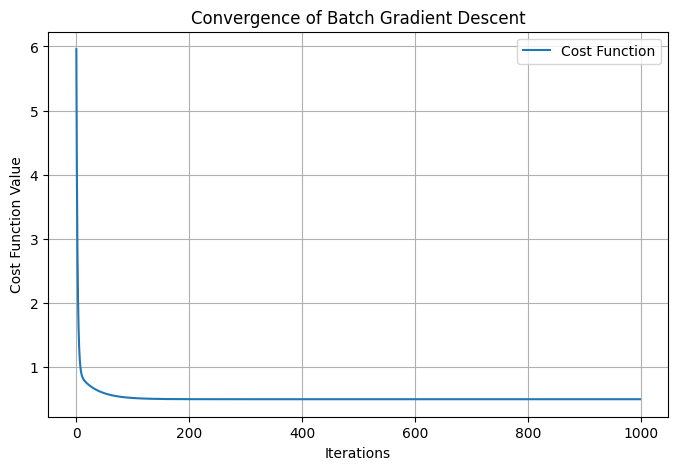

In [ ]:
def batch_gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.1  # Learning rate
num_iters = 1000  # Number of iterations

# Run Batch Gradient Descent
theta_optimal, cost_history = batch_gradient_descent(X_b, y, theta_init, alpha, num_iters)


plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of Batch Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

Batch Gradient Descent:
* To optimize the parameters of a linear regression model. Here's a high-level breakdown:

1. Batch Gradient Descent Function

The function batch_gradient_descent updates the model parameters (theta) using gradient descent.
It iterates num_iters times, computing the gradient of the cost function and updating theta accordingly.
The cost at each iteration is stored in cost_history to track how the error decreases over time.

2. Initializing Parameters

theta_init is initialized randomly to start the optimization.
alpha (learning rate) controls how big each step is when updating theta.
num_iters is set to 1000, meaning the optimization process runs for 1000 iterations.

3. Running Gradient Descent

The function is called with the input data, initial parameters, learning rate, and number of iterations.
It returns the optimized theta (best-fit model parameters) and the cost_history (error reduction over time).

4. Plotting Cost Function Convergence

The cost function values from each iteration are plotted to visualize how the algorithm converges.
If the cost decreases smoothly, it indicates that the gradient descent is working well.

5. Purpose of the Code
`
This code helps train a linear regression model using Batch Gradient Descent.
The goal is to minimize the cost function by adjusting the model’s parameters (theta).
The graph shows how well the model is learning—if the cost keeps decreasing, the model is improving.

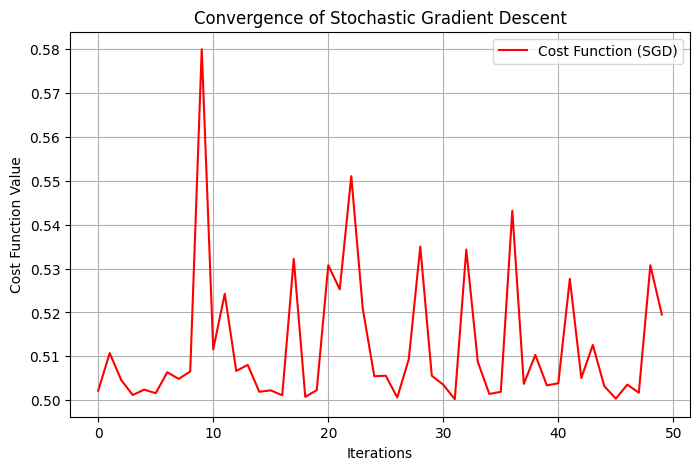

In [ ]:
def stochastic_gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        for j in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.01  # Learning rate (smaller for SGD stability)
num_iters = 50  # Number of iterations (SGD is noisy, so fewer iterations)

# Run Stochastic Gradient Descent
theta_optimal, cost_history = stochastic_gradient_descent(X_b, y, theta_init, alpha, num_iters)

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function (SGD)", color='r')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of Stochastic Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

Stochastic Gradient Descent (SGD):
* It is  for training a linear regression model.
*  Unlike Batch Gradient Descent, which updates model parameters using all training data at once, SGD updates the parameters using one random data point at a time.
* This makes it computationally efficient for large datasets but introduces some noise in the learning process.

How It Works

1. Initializing Parameters:

The model starts with randomly assigned weights (theta). A small learning rate is chosen to ensure stable convergence since SGD updates frequently.

2. Updating Parameters Using One Data Point at a Time:

Instead of computing the gradient using the entire dataset, SGD selects a random training example, calculates the gradient based on that example, and updates the weights (theta). This process is repeated multiple times.

3. Iterating Over Multiple Epochs:

The model runs for a certain number of iterations (epochs), where each epoch consists of multiple updates using different randomly chosen training samples.

4. Tracking Cost Reduction:

After each iteration, the cost function value is recorded to monitor how well the model is learning. The cost function generally decreases over time, though it fluctuates more compared to Batch Gradient Descent due to randomness.

5. Plotting the Cost Function Convergence:

A graph is generated to show how the cost function behaves over time. Unlike Batch Gradient Descent, which has a smooth decline in cost, SGD's cost function fluctuates before converging.

-> Key Characteristics of Stochastic Gradient Descent
Faster Computation:
* Since it updates parameters after each data point, it is much faster for large datasets.

* More Noise in Updates: The randomness in selecting data points causes fluctuations in the cost function.

* Better for Large-Scale Learning: Works well when data cannot fit in memory, making it a great choice for big data problems.

* Can Escape Local Minima: Due to its randomness, SGD is more likely to avoid getting stuck in local minima compared to Batch Gradient Descent.

-> Why Use Stochastic Gradient Descent?

1. It is ideal for large datasets where computing gradients for the entire dataset is too expensive.

2. It can learn in real-time, making it useful for applications like online learning and adaptive models.
3. The randomness helps avoid getting stuck in local minima, which can be beneficial in non-convex optimization problems.

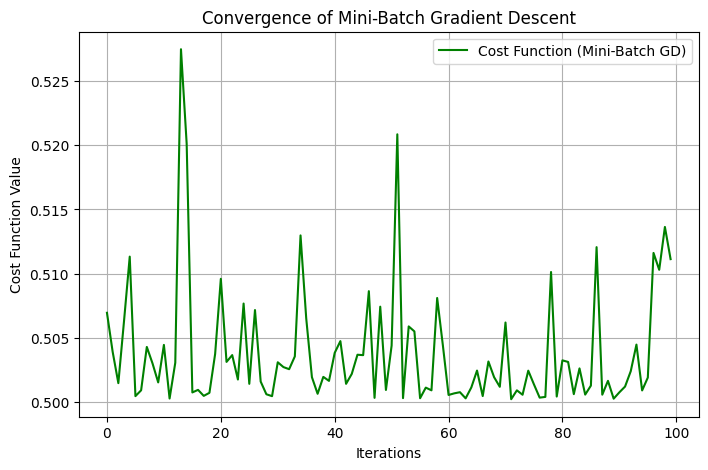

In [ ]:
def mini_batch_gradient_descent(X, y, theta, alpha, num_iters, batch_size):
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for j in range(0, m, batch_size):
            X_mini = X_shuffled[j:j+batch_size]
            y_mini = y_shuffled[j:j+batch_size]
            gradients = (2 / batch_size) * X_mini.T.dot(X_mini.dot(theta) - y_mini)
            theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.1  # Learning rate
num_iters = 100  # Number of iterations
batch_size = 32  # Mini-batch size

# Run Mini-Batch Gradient Descent
theta_optimal, cost_history = mini_batch_gradient_descent(X_b, y, theta_init, alpha, num_iters, batch_size)

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function (Mini-Batch GD)", color='g')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of Mini-Batch Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

Mini-Batch Gradient Descent (MBGD):
* It is a compromise between Batch Gradient Descent and Stochastic Gradient Descent (SGD).
*  Instead of using the entire dataset (like Batch GD) or a single random point (like SGD), it updates model parameters using small random batches of data.

How It Works

1. The dataset is shuffled and divided into smaller batches of a fixed size (e.g., 32 samples per batch).
2.The model updates its parameters after computing the gradient on each mini-batch.
3. This process repeats for multiple iterations until the cost function converges.

Advantages of Mini-Batch Gradient Descent

*  Faster than Batch GD – Computes updates more frequently, reducing overall training time.

*  More stable than SGD – Reduces the noise and fluctuation seen in SGD updates.
*  Balances efficiency and accuracy – Works well for large datasets where Batch GD is slow, and SGD is too noisy.
*  Leverages hardware optimizations – Works well with modern GPUs and parallel processing.

-> Convergence Behavior:

MBGD's cost function decreases smoothly compared to SGD but has some minor fluctuations due to mini-batch randomness.
It can converge faster than Batch GD while maintaining stability.

Mini-Batch Gradient Descent is widely used in machine learning and deep learning due to its balance between efficiency and stability. It is a great choice when working with large datasets where Batch GD is too slow and SGD is too unstable.

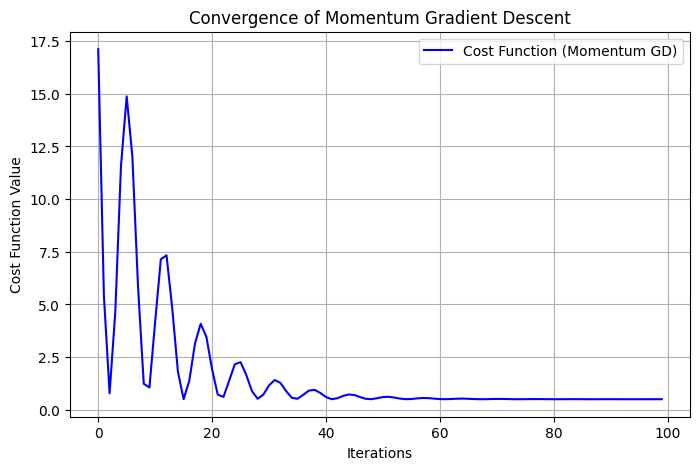

In [ ]:
def momentum_gradient_descent(X, y, theta, alpha, num_iters, beta=0.9):
    m = len(y)
    cost_history = []
    velocity = np.zeros_like(theta)
    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        velocity = beta * velocity + alpha * gradients
        theta -= velocity
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.1  # Learning rate
num_iters = 100  # Number of iterations
beta = 0.9  # Momentum parameter

# Run Momentum Gradient Descent
theta_optimal, cost_history = momentum_gradient_descent(X_b, y, theta_init, alpha, num_iters, beta)

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function (Momentum GD)", color='b')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of Momentum Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


Momentum Gradient Descent:

* Momentum Gradient Descent is an optimization technique that helps accelerate gradient descent, especially in cases with high curvature or noisy gradients. It does this by accumulating past gradients to create a velocity term, allowing the model to move faster in relevant directions while dampening oscillations.

Key Features:
* Faster Convergence – Reduces zigzagging in updates and speeds up training.
* Smoother Optimization Path – Helps navigate through ravines and avoid small fluctuations.
*  Momentum Term (β) – Controls how much of the past gradients influence the current step, reducing the impact of sudden gradient changes.

Comparison with Standard Gradient Descent:

* Without Momentum: Updates depend only on the current gradient, leading to slow convergence.
* With Momentum: Previous gradients help push updates forward, improving efficiency.

Use Cases:

* Effective for deep learning and large-scale machine learning tasks.
Works well in scenarios with high-dimensional data or saddle points where standard gradient descent slows down.

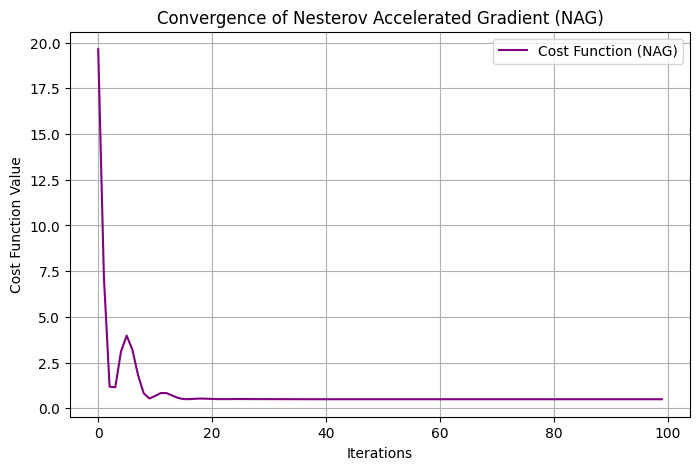

In [ ]:
def nesterov_accelerated_gradient(X, y, theta, alpha, num_iters, beta=0.9):
    m = len(y)
    cost_history = []
    velocity = np.zeros_like(theta)
    for i in range(num_iters):
        # Look ahead
        theta_temp = theta - beta * velocity
        gradients = (1 / m) * X.T.dot(X.dot(theta_temp) - y)
        velocity = beta * velocity + alpha * gradients
        theta -= velocity
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.1  # Learning rate
num_iters = 100  # Number of iterations
beta = 0.9  # Momentum parameter

# Run Nesterov Accelerated Gradient
theta_optimal, cost_history = nesterov_accelerated_gradient(X_b, y, theta_init, alpha, num_iters, beta)

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function (NAG)", color='purple')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of Nesterov Accelerated Gradient (NAG)")
plt.legend()
plt.grid(True)
plt.show()

Nesterov Accelerated Gradient (NAG):
*  It is an improvement over Momentum Gradient Descent, designed to provide faster convergence and better stability.
* Instead of updating parameters based on past gradients alone, NAG "looks ahead" by estimating the future position before computing gradients.

Key Features:
*  Better Anticipation – Adjusts updates before moving in a direction, reducing overshooting.
*  Faster Convergence – More efficient than standard momentum by correcting updates earlier.
*  Reduced Oscillations – Particularly useful in deep learning, where it stabilizes training.


Comparison with Momentum Gradient Descent:

* Momentum GD: Uses past gradients but may overshoot.
* NAG: Looks ahead, leading to smoother and more precise updates.

Use Cases:

* Commonly used in deep learning to train neural networks efficiently.
* Works well in non-convex optimization problems, where gradients fluctuate significantly.

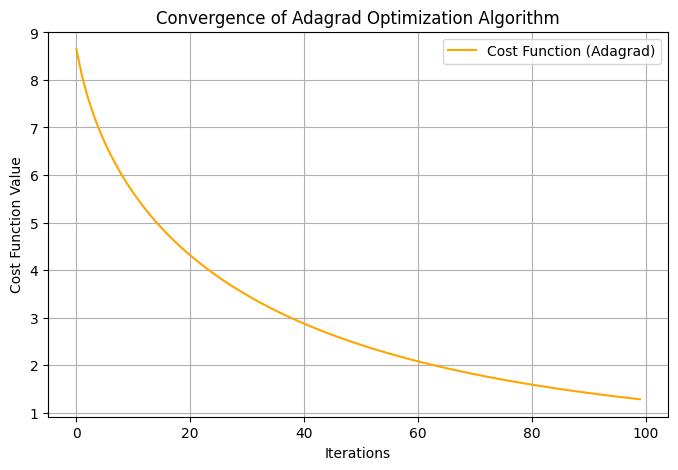

In [ ]:
def adagrad(X, y, theta, alpha, num_iters, epsilon=1e-8):
    m = len(y)
    cost_history = []
    grad_squared = np.zeros_like(theta)
    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        grad_squared += gradients**2
        theta -= alpha * gradients / (np.sqrt(grad_squared) + epsilon)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.1  # Learning rate
num_iters = 100  # Number of iterations

# Run Adagrad
theta_optimal, cost_history = adagrad(X_b, y, theta_init, alpha, num_iters)

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function (Adagrad)", color='orange')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of Adagrad Optimization Algorithm")
plt.legend()
plt.grid(True)
plt.show()

Adagrad (Adaptive Gradient Algorithm):
* It is an optimization method that adapts the learning rate for each parameter individually.
* It is particularly useful for problems with sparse features, where some parameters require more updates than others.

Key Features:
* Adaptive Learning Rate – Parameters with frequent updates get smaller learning rates, while rare updates retain larger rates.
* Eliminates Manual Learning Rate Tuning – No need to adjust the learning rate manually for different features.
* Prevents Overshooting – Gradually reduces step size, stabilizing convergence.

How It Works:
* It maintains a cumulative sum of squared gradients for each parameter.
* This sum is used to scale down the learning rate, ensuring frequently updated parameters slow down.
* The algorithm prevents overly aggressive updates but can sometimes slow down too much.

Use Cases:
* Sparse data problems like NLP (Natural Language Processing).
* Feature-rich datasets where some parameters need higher attention than others.

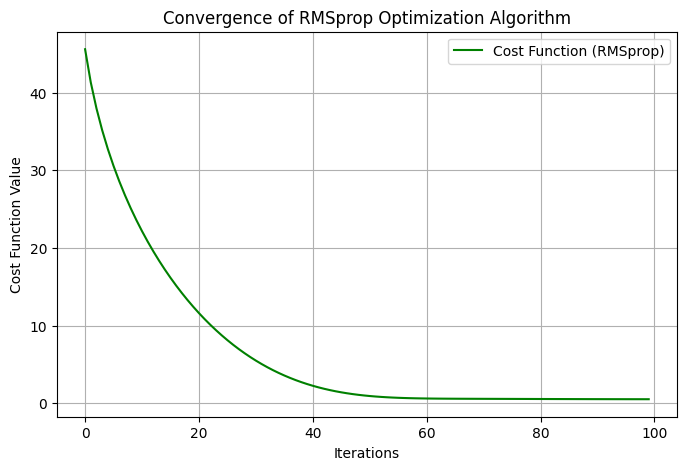

In [ ]:
def rmsprop(X, y, theta, alpha, num_iters, beta=0.9, epsilon=1e-8):
    m = len(y)
    cost_history = []
    grad_squared = np.zeros_like(theta)
    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        grad_squared = beta * grad_squared + (1 - beta) * gradients**2
        theta -= alpha * gradients / (np.sqrt(grad_squared) + epsilon)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.1  # Learning rate
num_iters = 100  # Number of iterations
beta = 0.9  # Decay rate for moving average

# Run RMSprop
theta_optimal, cost_history = rmsprop(X_b, y, theta_init, alpha, num_iters, beta)

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function (RMSprop)", color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of RMSprop Optimization Algorithm")
plt.legend()
plt.grid(True)
plt.show()

RMSprop (Root Mean Square Propagation):
* It is an adaptive optimization algorithm designed to address the shortcomings of Adagrad by preventing the learning rate from decaying too quickly.
*  It is widely used in deep learning due to its stability and efficiency.


Key Features:

*  Adaptive Learning Rate – Adjusts step sizes for each parameter to ensure smooth updates.
*  Uses a Moving Average of Squared Gradients – Prevents drastic changes in learning rate, unlike Adagrad.
*  More Stable Convergence – Works well for non-stationary objectives and noisy gradients.

How It Works:

* Maintains an exponentially weighted moving average of past squared gradients.
* This prevents extreme decay in the learning rate while keeping updates balanced.
* The decay factor (β) controls how much past gradients influence the current step.

Use Cases:
* Deep learning models, especially in recurrent neural networks (RNNs).
* Online learning scenarios, where data distribution changes over time.
* Problems where Adagrad slows down too much.

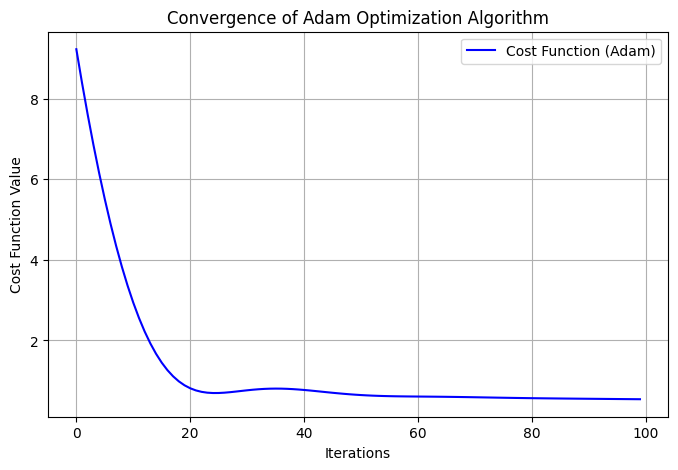

In [ ]:
def adam(X, y, theta, alpha, num_iters, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = len(y)
    cost_history = []
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0
    for i in range(num_iters):
        t += 1
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * gradients**2
        m_t_hat = m_t / (1 - beta1**t)
        v_t_hat = v_t / (1 - beta2**t)
        theta -= alpha * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_init = np.random.randn(2, 1)  # Random weights
alpha = 0.1  # Learning rate
num_iters = 100  # Number of iterations
beta1 = 0.9  # Decay rate for first moment
beta2 = 0.999  # Decay rate for second moment

# Run Adam optimizer
theta_optimal, cost_history = adam(X_b, y, theta_init, alpha, num_iters, beta1, beta2)

# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, label="Cost Function (Adam)", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Convergence of Adam Optimization Algorithm")
plt.legend()
plt.grid(True)
plt.show()

Adam (Adaptive Moment Estimation):
* It combines the advantages of both Momentum and RMSprop.
* It computes adaptive learning rates for each parameter based on estimates of first and second moments of the gradients.
* Adam is widely used in deep learning due to its efficiency and ability to handle noisy gradients.

Key Features:

*  First Moment (m_t) – Keeps track of the moving average of gradients, akin to momentum.
*  Second Moment (v_t) – Keeps track of the moving average of squared gradients, like RMSprop.
*  Bias Correction – Corrects bias in moment estimates at the beginning of training.
*  Self-Tuning – Combines adaptive learning rates and momentum for robust optimization.

How It Works:

* First Moment (m_t): Updates are influenced by previous gradients, which help accelerate convergence.
* Second Moment (v_t): Controls the learning rate by scaling it based on the variance of gradients, preventing overly large updates.
* Bias Correction: As training progresses, Adam corrects the moments, ensuring the optimizer remains effective throughout the process.

Use Cases:
* Deep learning models, especially in complex architectures like neural networks.
* Non-convex optimization problems, where gradients are noisy and sparse.
Large-scale machine learning tasks, where stability and speed are crucial.
* Adam is generally considered one of the most reliable optimizers for modern machine learning tasks.